# Spatial Model fitting in GLS
In this exercise we will fit a linear model using a Spatial structure as covariance matrix. 
We will use GLS to get better estimators.

As always we will need to load the necessary libraries.

In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
sys.path.append('..')
sys.path.append('../spystats')
import django
django.setup()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

import tools

Use this to automate the process. Be carefull it can overwrite current results

`run ../HEC_runs/fit_fia_logbiomass_logspp_GLS.py /RawDataCSV/idiv_share/plotsClimateData_11092017.csv /apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv -85 -80 30 35`

## Importing data
We will use the FIA dataset and for exemplary purposes we will take a subsample of this data. 
Also important.
The empirical variogram has been calculated for the entire data set using the residuals of an OLS model. 

We will use some auxiliary functions defined in the `fit_fia_logbiomass_logspp_GLS`.
You can inspect the functions using the ?? symbol.

In [2]:
from HEC_runs.fit_fia_logbiomass_logspp_GLS import initAnalysis

In [3]:
from HEC_runs.fit_fia_logbiomass_logspp_GLS import prepareDataFrame,loadVariogramFromData,buildSpatialStructure, calculateGLS, initAnalysis, fitGLSRobust

In [4]:
section = initAnalysis("/RawDataCSV/idiv_share/FIA_Plots_Biomass_11092017.csv",
                        "/apps/external_plugins/spystats/HEC_runs/results/variogram/data_envelope.csv",
                       -130,-60,30,40)

INFO:root:Reading data
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reprojecting to Alberts equal area
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Removing possible duplicates. 
 This avoids problems of Non Positive semidefinite
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Fitting OLS linear model: logBiomass ~ logSppN 
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Subselecting Region


In [5]:
#section = initAnalysis("/RawDataCSV/idiv_share/plotsClimateData_11092017.csv",
#                        "/apps/external_plugins/spystats/HEC_runs/results/variogram/data_envelope.csv",
#                       -85,-80,30,35)

# IN HEC
#section = initAnalysis("/home/hpc/28/escamill/csv_data/idiv/FIA_Plots_Biomass_11092017.csv","/home/hpc/28/escamill/spystats/HEC_runs/results/variogram/data_envelope.csv",-85,-80,30,35)

In [6]:
section.shape

(18414, 22)

Now we will obtain the data from the calculated empirical variogram.

In [7]:
gvg,tt = loadVariogramFromData("/apps/external_plugins/spystats/HEC_runs/results/variogram/data_envelope.csv",section)

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reading the empirical Variogram file
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Instantiating a Variogram object with the values calculated before
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Dropping possible Nans
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Instantiating Model...
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:fitting whittle Model with the empirical variogram
INFO:tools:Removing possible NA's
INFO:tools:Adding model to the attributes space
INFO:tools:Added fitted model to attributes
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Model fitted


INFO:tools:Using previously stored envelope. Use refresh option to recalculate.


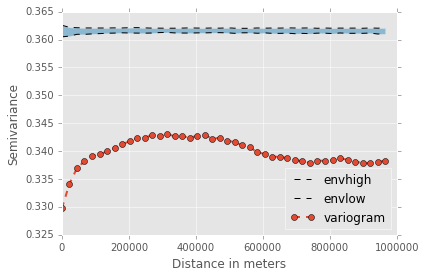

In [8]:
gvg.plot(refresh=False,with_envelope=True)

In [11]:
resum,gvgn,resultspd,results = fitGLSRobust(section,gvg,num_iterations=10,distance_threshold=1000000)

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Building Spatial Covariance Matrix
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Calculating Distance Matrix
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Calculating GLS estimators
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Fitting linear model using GLS
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:RESULTS::: n_obs: 18414.0, r-squared: 0.898310288151, {{"Intercept":8.4466941208,"logSppN":0.3949644501},{"Intercept":0.0,"logSppN":0.0},{"0":{"Intercept":8.4204865441,"logSppN":0.380414251},"1":{"Intercept":8.4729016975,"logSppN":0.4095146491}}}
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Recalculating variogram
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Refiting Theoretical Variogram
../spystats/tools.py:625: RuntimeWarning: invalid value encountered in double_scalars
  g_h = ((sill - nugget)*(1 - np.exp(-(h**alpha / range_a**alpha)))) + nugget*Ih
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Variogram parameters: range 114072.405376, sill 0.32919727

In [46]:
resum.as_text

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
Dep. Variable:             logBiomass   R-squared:                       0.753
Model:                            GLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 5.623e+04
Date:                Sat, 03 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:21:06   Log-Likelihood:                -16502.
No. Observations:               18414   AIC:                         3.301e+04
Df Residuals:                   18412   BIC:                         3.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

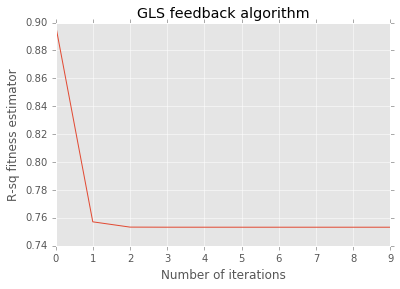

In [25]:
plt.plot(resultspd.rsq)
plt.title("GLS feedback algorithm")
plt.xlabel("Number of iterations")
plt.ylabel("R-sq fitness estimator")

In [26]:
resultspd.columns

Index([u'conf_int', u'params', u'pvals', u'rsq'], dtype='object')

In [34]:
a = map(lambda x : x.to_dict(), resultspd['params'])

In [36]:
paramsd = pd.DataFrame(a)

In [38]:
paramsd

,Intercept,logSppN
0,8.446694,0.394964
1,8.426869,0.393331
2,8.427064,0.393308
3,8.427068,0.393308
4,8.427069,0.393308
5,8.427069,0.393308
6,8.427069,0.393308
7,8.427069,0.393308
8,8.427069,0.393308
9,8.427069,0.393308


AttributeError: 'module' object has no attribute 'get_yaxis'

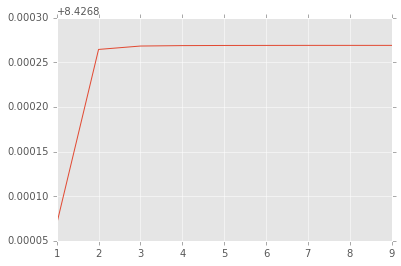

In [44]:
plt.plot(paramsd.Intercept.loc[1:])
plt.get_yaxis().get_major_formatter().set_useOffset(False)

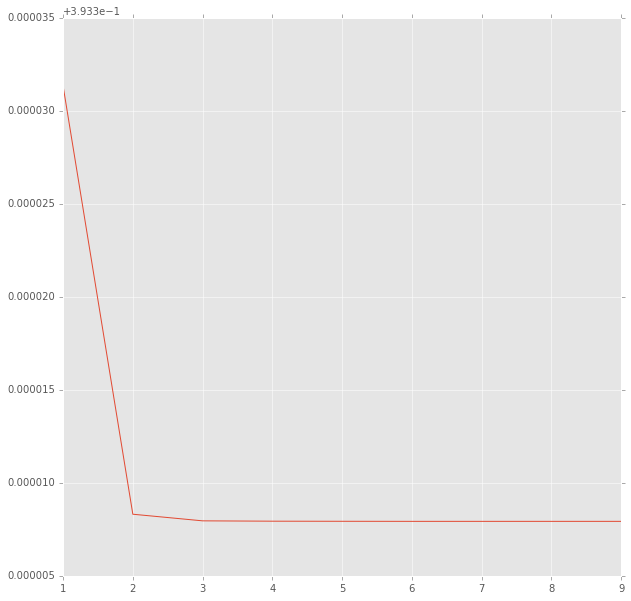

In [45]:
fig = plt.figure(figsize=(10,10))
plt.plot(paramsd.logSppN.iloc[1:])

In [10]:
variogram_data_path = "/apps/external_plugins/spystats/HEC_runs/results/variogram/data_envelope.csv"
thrs_dist = 100000
emp_var_log_log = pd.read_csv(variogram_data_path)

## Instantiating the variogram object

In [11]:
gvg = tools.Variogram(section,'logBiomass',using_distance_threshold=thrs_dist)
gvg.envelope = emp_var_log_log
gvg.empirical = emp_var_log_log.variogram
gvg.lags = emp_var_log_log.lags
#emp_var_log_log = emp_var_log_log.dropna()
#vdata = gvg.envelope.dropna()

## Instantiating theoretical variogram model

In [25]:
matern_model = tools.MaternVariogram(sill=0.34,range_a=100000,nugget=0.33,kappa=4)
whittle_model = tools.WhittleVariogram(sill=0.340246718396,range_a=41188.0234423,nugget=0.329937603763,alpha=1.12143687914)
exp_model = tools.ExponentialVariogram(sill=0.34,range_a=100000,nugget=0.33)
gaussian_model = tools.GaussianVariogram(sill=0.34,range_a=100000,nugget=0.33)
spherical_model = tools.SphericalVariogram(sill=0.34,range_a=100000,nugget=0.33)

In [27]:
gvg.model = whittle_model
#gvg.model = matern_model
#models = map(lambda model : gvg.fitVariogramModel(model),[matern_model,whittle_model,exp_model,gaussian_model,spherical_model])

gvg.fitVariogramModel(whittle_model)

INFO:tools:Removing possible NA's
INFO:tools:Adding model to the attributes space
INFO:tools:Added fitted model to attributes


< Whittle Variogram : sill 0.340288265053, range 40962.1571427, nugget 0.57430860088, alpha1.12289624702 >

INFO:tools:Using previously stored envelope. Use refresh option to recalculate.


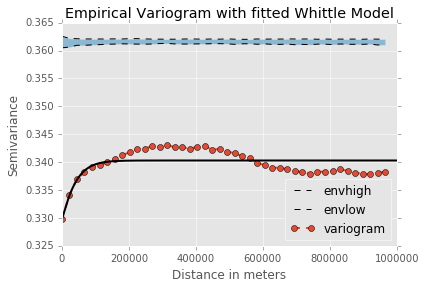

In [28]:
import numpy as np
xx = np.linspace(0,1000000,1000)

gvg.plot(refresh=False,with_envelope=True)
plt.plot(xx,gvg.model.f(xx),lw=2.0,c='k')
plt.title("Empirical Variogram with fitted Whittle Model")

In [29]:
expdat = pd.DataFrame({'x':xx,'tvar':gvg.model.f(xx)})

In [31]:
expdat.to_csv('/outputs/theoretical_var.csv')

In [ ]:
def randomSelection(n,p):
    idxs = np.random.choice(n,p,replace=False)
    random_sample = new_data.iloc[idxs]
    return random_sample
#################
n = len(new_data)
p = 3000 # The amount of samples taken (let's do it without replacement)

In [ ]:
random_sample = randomSelection(n,100)